# Лабораторная работа №2
**"Непрерывные выпукло-вогнутые игры"**

**Выполнил: Александров А. Н., ИУ8-104**

**Вариант: 1**

## Задание
Функция ядра имеет вид:

$$H(x, y) = ax^2 + by^2 + cxy + dx + ey,$$

где:

|  a |   b  |   c  |   d  |   e  |
|:--:|:----:|:----:|:----:|:----:|
| -5 | 5/12 | 10/3 | -2/3 | -4/3 |

Найти оптимальные стратегии непрерывной выпукло-вогнутой антагонистической игры аналитическим и численным методами.

In [37]:
import logging

import sympy
from sympy import N, Eq, abc
# To represent multiple expressions in output of single cell.
from IPython.display import display

# from game_theory.utils.matrix_games.brown_robinson.brown_robinson import BrownRobinson

logging.basicConfig(level=logging.INFO, format='%(message)s')

In [38]:
ROUND_CONST: int = 4
A, B, C, D, E = (
    round(-5, ROUND_CONST),
    round(5 / 12, ROUND_CONST),
    round(10 / 3, ROUND_CONST),
    round(-2 / 3, ROUND_CONST),
    round(-4 / 3, ROUND_CONST),
)

In [39]:
# Входные параметры: коэффициенты функции ядра.
a, b, c, d, e = sympy.var(("a", "b", "c", "d", "e"))

In [40]:
# Переменные.
x, y = sympy.symbols(("x", "y"))
# Задание функции ядра. 
kernel_func = sympy.Lambda(
    (x, y),
    a * x ** 2 + b * y ** 2 + c * x * y + d * x + e * y,
)

kernel_func

Lambda((x, y), a*x**2 + b*y**2 + c*x*y + d*x + e*y)

In [41]:
kernel_func.subs({a: A, b: B, c: C, d: D, e: E})

Lambda((x, y), -5*x**2 + 3.3333*x*y - 0.6667*x + 0.4167*y**2 - 1.3333*y)

In [42]:
kernel_xx = sympy.diff(kernel_func(x, y), x, 2, evaluate=False)
kernel_xx_eval = kernel_xx.doit()
kernel_xx_subs: float = kernel_xx_eval.subs({a: A, b: B, c: C, d: D, e: E})

display(Eq(kernel_xx, kernel_xx_eval))
Eq(kernel_xx_eval, kernel_xx_subs)

Eq(Derivative(a*x**2 + b*y**2 + c*x*y + d*x + e*y, (x, 2)), 2*a)

Eq(2*a, -10)

In [43]:
kernel_yy = sympy.diff(kernel_func(x, y), y, 2, evaluate=False)
kernel_yy_eval = kernel_yy.doit()
kernel_yy_subs: float = kernel_yy_eval.subs({a: A, b: B, c: C, d: D, e: E})

display(Eq(kernel_yy, kernel_yy_eval))
Eq(kernel_yy_eval, kernel_yy_subs)

Eq(Derivative(a*x**2 + b*y**2 + c*x*y + d*x + e*y, (y, 2)), 2*b)

Eq(2*b, 0.8334)

In [44]:
is_convex_concave: bool = kernel_xx_subs < 0 < kernel_yy_subs
assert is_convex_concave, (
    "Игра не является выпукло-вогнутой, т.к. для функции ядра одновременно не выполняется оба условия: \n"
    f"H_xx = {2 * a:.2f} < 0 и H_yy = {2 * b:.2f} > 0"
)

### Для нахождения оптимальных стратегий найдем производные функции ядра по каждой переменной

In [45]:
# Производная по x.
kernel_x = sympy.diff(kernel_func(x, y), x, evaluate=False)
kernel_x_eval = kernel_x.doit()
kernel_x_subs = kernel_x_eval.subs({a: A, b: B, c: C, d: D, e: E})
# Производная по y.
kernel_y = sympy.diff(kernel_func(x, y), y, evaluate=False)
kernel_y_eval = kernel_y.doit()
kernel_y_subs = kernel_y_eval.subs({a: A, b: B, c: C, d: D, e: E})

In [46]:
display(Eq(kernel_x, kernel_x_eval))
Eq(kernel_x_eval, kernel_x_subs)

Eq(Derivative(a*x**2 + b*y**2 + c*x*y + d*x + e*y, x), 2*a*x + c*y + d)

Eq(2*a*x + c*y + d, -10*x + 3.3333*y - 0.6667)

In [47]:
display(Eq(kernel_y, kernel_y_eval))
Eq(kernel_y_eval, kernel_y_subs)

Eq(Derivative(a*x**2 + b*y**2 + c*x*y + d*x + e*y, y), 2*b*y + c*x + e)

Eq(2*b*y + c*x + e, 3.3333*x + 0.8334*y - 1.3333)

#### После приравнивания производных к нулю получим

In [48]:
# 
zero_kernel_x, = sympy.solve(Eq(kernel_x_eval, 0), x)
zero_kernel_x_subs = zero_kernel_x.subs({a: A, b: B, c: C, d: D, e: E})
# 
zero_kernel_y, = sympy.solve(Eq(kernel_y_eval, 0), y)
zero_kernel_y_subs = zero_kernel_y.subs({a: A, b: B, c: C, d: D, e: E})

In [49]:
display(Eq(x, zero_kernel_x))
display(N(Eq(x, zero_kernel_x_subs), ROUND_CONST))

Eq(x, (-c*y - d)/(2*a))

Eq(x, 0.3333*y - 0.06667)

In [50]:
display(Eq(y, zero_kernel_y))
display(N(Eq(y, zero_kernel_y_subs), ROUND_CONST))

Eq(y, (-c*x - e)/(2*b))

Eq(y, 1.6 - 4.0*x)

#### Учитывая, что х, удолжны быть неотрицательными, для оптимальных стратегий соответственно имеем

In [55]:
# Кусочно заданная функция относительно y.
psi_y = sympy.Piecewise(
    (zero_kernel_x, y >= -d / c),
    (0, y < -d / c)
)
psi_y_subs = psi_y.subs({a: A, b: B, c: C, d: D, e: E})
# Кусочно заданная функция относительно x.
phi_x = sympy.Piecewise(
    (zero_kernel_y, y >= -e / c),
    (0, y < -e / c)
)
phi_x_subs = phi_x.subs({a: A, b: B, c: C, d: D, e: E})

In [56]:
display(Eq(abc.psi, psi_y))
display(Eq(abc.psi, psi_y_subs))

Eq(psi, Piecewise(((-c*y - d)/(2*a), y >= -d/c), (0, True)))

Eq(psi, Piecewise((0.33333*y - 0.06667, y >= 0.200012000120001), (0, True)))

In [57]:
display(Eq(abc.phi, phi_x))
display(Eq(abc.phi, phi_x_subs))

Eq(phi, Piecewise(((-c*x - e)/(2*b), y >= -e/c), (0, True)))

Eq(phi, Piecewise((1.59983201343892 - 3.9996400287977*x, y >= 0.399993999939999), (0, True)))

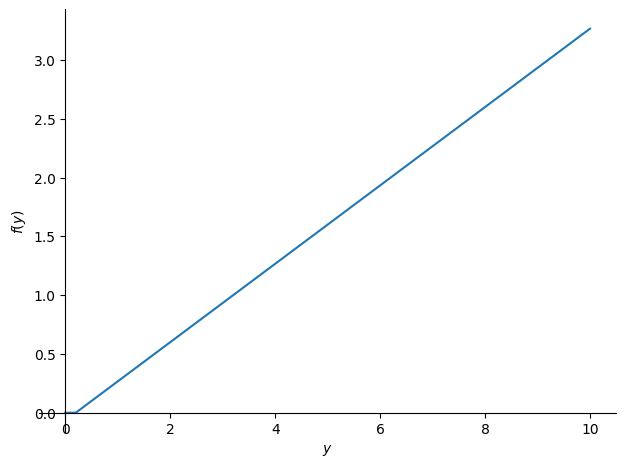

ValueError: The same variable should be used in all univariate expressions being plotted.

In [59]:
# sympy.plotting.plot(psi_y_subs, (y, 0, 10))
# sympy.plotting.plot(phi_x_subs, (x, 0, 10))

#### Совместное аналитическое решение этой системы имеет вид

In [ ]:
# Система из двух уравнений

In [ ]:
sol